In [1]:
!pip show opencv-python
!pip show scikit-image

Name: opencv-python
Version: 4.5.5.64
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: None
Author-email: None
License: MIT
Location: c:\users\t1sri\appdata\roaming\python\python38\site-packages
Requires: numpy, numpy
Required-by: 
Name: scikit-image
Version: 0.18.1
Summary: Image processing in Python
Home-page: https://scikit-image.org
Author: None
Author-email: None
License: Modified BSD
Location: c:\program files\anaconda\lib\site-packages
Requires: numpy, scipy, matplotlib, networkx, pillow, imageio, tifffile, PyWavelets
Required-by: 


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [3]:
# img is a 2d array of pixels each having an array holding r,g,b values, i.e. [b,g,r]?, which range 0 (black) to 255 (white).
img = cv2.imread("index.jpg")

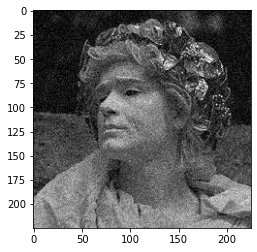

In [4]:
#cv2.imshow(img)
plt.imshow(img)

In [8]:
# experimenting with denoising
img2 = cv2.fastNlMeansDenoisingColored(img, h=10)

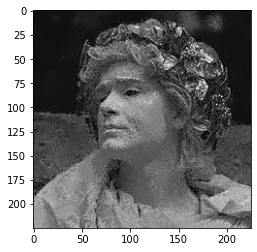

In [9]:
plt.imshow(img2)

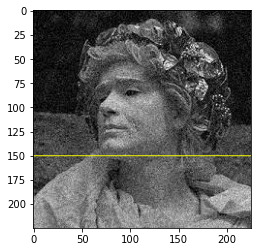

In [29]:
# experimenting with image data
for i in range(len(img[150])):
    img[150][i] = [255, 255, 0]
    
plt.imshow(img)

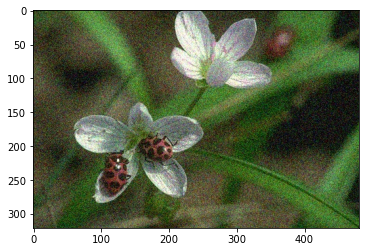

In [34]:
# the standard bgr must be converted to rgb for further processing
colorimg = cv2.imread("flower_noisy.jpg")
colorimg = cv2.cvtColor(colorimg, cv2.COLOR_BGR2RGB)
plt.imshow(colorimg)

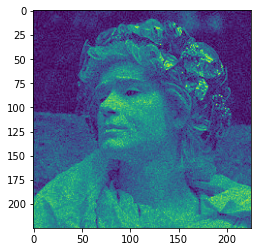

In [7]:
# grayscaling
greyimg = cv2.imread("index.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(greyimg)

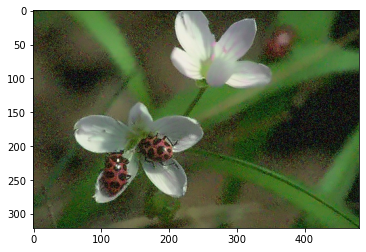

In [40]:
# denoising colored image
colorimg2 = cv2.fastNlMeansDenoisingColored(colorimg, h=10)
plt.imshow(colorimg2)

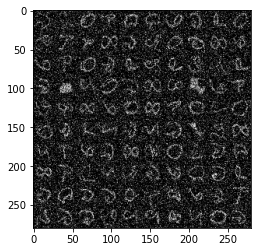

In [54]:
# denoising and displaying a text image
textimg = cv2.imread("noisy_text.png")
textimg = cv2.cvtColor(textimg, cv2.COLOR_BGR2RGB)
plt.imshow(textimg)

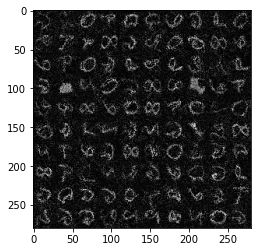

In [58]:
text2 = cv2.fastNlMeansDenoisingColored(textimg, h=40)
plt.imshow(text2)

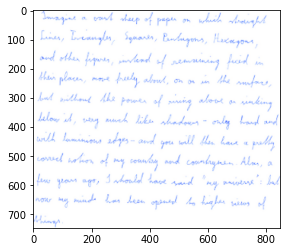

In [4]:
# denoising and displaying a colored text image
handwrit = cv2.imread("handwritten.png")
handwrit = cv2.cvtColor(handwrit, cv2.COLOR_BGR2RGB)
plt.imshow(handwrit)

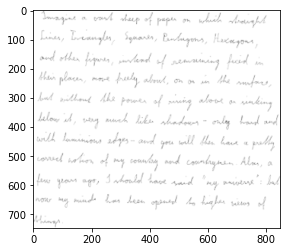

In [5]:
handwrit = cv2.cvtColor(handwrit, cv2.COLOR_RGB2GRAY)
plt.imshow(handwrit, cmap='gray', vmin=0, vmax=255)

In [6]:
# binarization through taking a threshold value manually (global average)
average = 0
for row in handwrit:
    for pixel in row:
        average+=pixel
    
average/=(len(handwrit)*len(handwrit[0]))
average

250.17830764391317

True

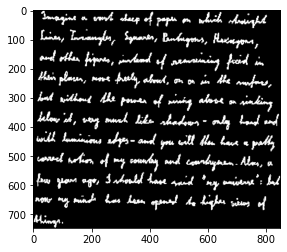

In [7]:
handwrit2 = cv2.threshold(handwrit, average, 255, cv2.THRESH_BINARY)[1]
plt.imshow(handwrit2, cmap="binary", vmin=0, vmax=255)
# handwrit2
cv2.imwrite('handwritten-binary.jpg', handwrit2)

In [89]:
hand2 = cv2.fastNlMeansDenoisingColored(handwrit, h=40)
plt.imshow(hand2)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\photo\src\denoising.cpp:178: error: (-5:Bad argument) Type of input image should be CV_8UC3 or CV_8UC4! in function 'cv::fastNlMeansDenoisingColored'


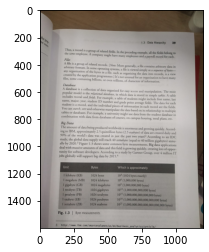

In [149]:
# Now, working on a normal image captured by a smartphone of a textbook page
tbpg = cv2.imread("tbpg.jpg")
if tbpg.all() == None:
    print("image not found")
    
tbpg = cv2.cvtColor(tbpg, cv2.COLOR_BGR2RGB)
plt.imshow(tbpg)

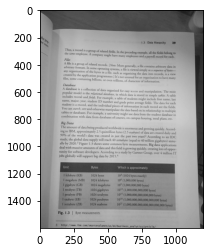

In [144]:
tbpg = cv2.cvtColor(tbpg, cv2.COLOR_RGB2GRAY)
plt.imshow(tbpg, cmap='gray', vmin=0, vmax=255)

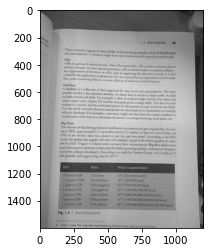

In [145]:
#Sharpening. Lets more characters be seen after binarization. But produces noise.
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
tbpg = cv2.filter2D(src=tbpg, ddepth=-1, kernel=kernel)
plt.imshow(tbpg, cmap='gray', vmin=0, vmax=255)

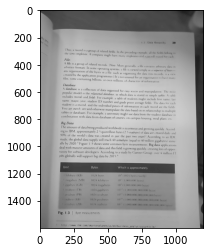

In [146]:
# denoising after sharpening to reduce noise
tbpg = cv2.fastNlMeansDenoising(tbpg, h=40)
plt.imshow(tbpg, cmap='gray', vmin=0, vmax=255)

In [147]:
average = 0
for row in tbpg:
    for pixel in row:
        average+=pixel
    
average/=(len(tbpg)*len(tbpg[0]))
average

152.413225

True

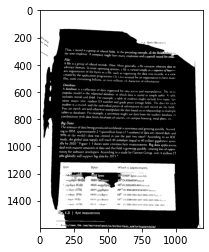

In [148]:
# then, binarization
tbpg2 = cv2.threshold(tbpg, average, 255, cv2.THRESH_BINARY)[1]
plt.imshow(tbpg2, cmap="binary", vmin=0, vmax=255)
# handwrit2
cv2.imwrite('tbpgbin3.jpg', tbpg2)

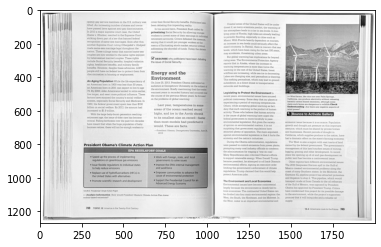

In [9]:
pear = cv2.imread("pear.jpg")
if pear.all() == None:
    print("image not found")
    
pear = cv2.cvtColor(pear, cv2.COLOR_BGR2RGB)
# plt.imshow(tbpg)

pear = cv2.cvtColor(pear, cv2.COLOR_RGB2GRAY)
plt.imshow(pear, cmap='gray', vmin=0, vmax=255)

In [10]:
# sharpening
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

image_sharp = cv2.filter2D(src=pear, ddepth=-1, kernel=kernel)


True

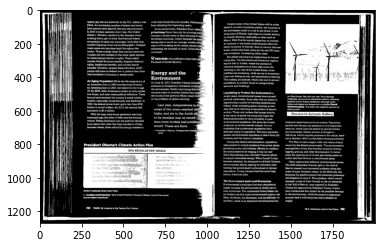

In [11]:
average = 0
for row in pear:
    for pixel in row:
        average+=pixel
    
average/=(len(pear)*len(pear[0]))
average

pear2 = cv2.threshold(pear, average, 255, cv2.THRESH_BINARY)[1]
plt.imshow(pear2, cmap="binary", vmin=0, vmax=255)
# handwrit2
cv2.imwrite('pear-binarized.jpg', pear2)

In [ ]:
# combining all the steps into one cell
tbpg = cv2.imread("tbpg.jpg")
if tbpg.all() == None:
    print("image not found")
    
tbpg = cv2.cvtColor(tbpg, cv2.COLOR_BGR2RGB)
plt.imshow(tbpg)

tbpg = cv2.cvtColor(tbpg, cv2.COLOR_RGB2GRAY)
plt.imshow(tbpg, cmap='gray', vmin=0, vmax=255)

#Sharpening. Lets more characters be seen after binarization. But produces noise.
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
tbpg = cv2.filter2D(src=tbpg, ddepth=-1, kernel=kernel)
plt.imshow(tbpg, cmap='gray', vmin=0, vmax=255)

tbpg = cv2.fastNlMeansDenoising(tbpg, h=40)
plt.imshow(tbpg, cmap='gray', vmin=0, vmax=255)

average = 0
for row in tbpg:
    for pixel in row:
        average+=pixel
    
average/=(len(tbpg)*len(tbpg[0]))
average

tbpg = cv2.threshold(tbpg, average, 255, cv2.THRESH_BINARY)[1]
plt.imshow(tbpg, cmap="binary", vmin=0, vmax=255)
# handwrit
cv2.imwrite('tbpgbin3.jpg', tbpg)

True

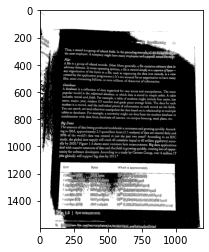

In [152]:
# experimenting to optimize order of operations for best results

tbpg = cv2.imread("tbpg.jpg")
if tbpg.all() == None:
    print("image not found")

tbpg = cv2.cvtColor(tbpg, cv2.COLOR_BGR2GRAY)
# plt.imshow(tbpg, cmap='gray', vmin=0, vmax=255)

#Sharpening.
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
tbpg = cv2.filter2D(src=tbpg, ddepth=-1, kernel=kernel)
# plt.imshow(tbpg, cmap='gray', vmin=0, vmax=255)


# plt.imshow(tbpg, cmap='gray', vmin=0, vmax=255)

average = 0
for row in tbpg:
    for pixel in row:
        average+=pixel
average/=(len(tbpg)*len(tbpg[0]))

tbpg = cv2.threshold(tbpg, average, 255, cv2.THRESH_BINARY)[1]
plt.imshow(tbpg, cmap="binary", vmin=0, vmax=255)

tbpg = cv2.fastNlMeansDenoising(tbpg, h=40)

average = 0
for row in tbpg:
    for pixel in row:
        average+=pixel
average/=(len(tbpg)*len(tbpg[0]))

tbpg = cv2.threshold(tbpg, average, 255, cv2.THRESH_BINARY)[1]
plt.imshow(tbpg, cmap="binary", vmin=0, vmax=255)

# handwrit
cv2.imwrite('tbpgbin4.jpg', tbpg)

True

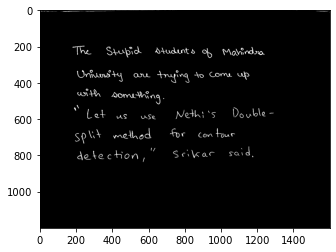

In [11]:
# switching to an adaptive (locally-weighted) threshold for binarization - gaussian threshold

tbpg = cv2.imread("doublesplit.jpg")
if tbpg.all() == None:
    print("image not found")
    
tbpg = cv2.cvtColor(tbpg, cv2.COLOR_BGR2RGB)
# plt.imshow(tbpg)

tbpg = cv2.cvtColor(tbpg, cv2.COLOR_RGB2GRAY)
# plt.imshow(tbpg, cmap='gray', vmin=0, vmax=255)

#Sharpening. Lets more characters be seen after binarization. But produces noise.
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
tbpg = cv2.filter2D(src=tbpg, ddepth=-1, kernel=kernel)
# plt.imshow(tbpg, cmap='gray', vmin=0, vmax=255)

tbpg = cv2.fastNlMeansDenoising(tbpg, h=40)
# plt.imshow(tbpg, cmap='gray', vmin=0, vmax=255)

tbpg = cv2.adaptiveThreshold(tbpg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

plt.imshow(tbpg, cmap="binary", vmin=0, vmax=255)
cv2.imwrite('doublesplit-binarized.jpg', tbpg)

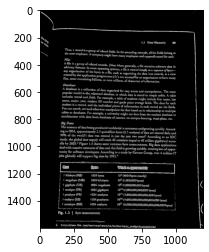

In [3]:
# final result:

tbpg = cv2.imread("tbpg.jpg")
if tbpg.all() == None:
    print("image not found")
    
tbpg = cv2.cvtColor(tbpg, cv2.COLOR_BGR2RGB)
# plt.imshow(tbpg)

tbpg = cv2.cvtColor(tbpg, cv2.COLOR_RGB2GRAY)
# plt.imshow(tbpg, cmap='gray', vmin=0, vmax=255)

#Sharpening. Lets more characters be seen after binarization. But produces noise.
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
tbpg = cv2.filter2D(src=tbpg, ddepth=-1, kernel=kernel)
# plt.imshow(tbpg, cmap='gray', vmin=0, vmax=255)

tbpg = cv2.fastNlMeansDenoising(tbpg, h=40)
# plt.imshow(tbpg, cmap='gray', vmin=0, vmax=255)

tbpg = cv2.adaptiveThreshold(tbpg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

plt.imshow(tbpg, cmap="binary", vmin=0, vmax=255)
# cv2.imwrite('tbpg-binarized-gauss.jpg', tbpg)

In [ ]:
# contour detection: (incomplete)

In [26]:
# tbpg = cv2.Canny(tbpg, threshold1=100, threshold2=200)
# tbpg = cv2.Sobel(tbpg, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
# plt.imshow(tbpg, cmap="binary", vmin=0, vmax=255)
# cv2.imwrite('tbpgedgesorbel.jpg', tbpg)

from PIL import Image, ImageFilter
image = Image.open(r"tbpgbingauss.jpg")
image = image.convert("L")
image = image.filter(ImageFilter.FIND_EDGES)
image.save(r"tbpgedge.jpg")

In [ ]:

# find the contours from the thresholded image
# contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# draw all contours
# image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
# cv2.imwrite('binaryhand.jpg', image)